In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution, maplotlib_plot_map as plot_map

In [88]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index)

In [89]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/Downloads/zoe_uk_active_cases_2020-09-20_2020-09-22-17-50.pickle


In [81]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/Downloads/zoe_uk_active_cases_2020-09-18_2020-09-20-16-57.pickle


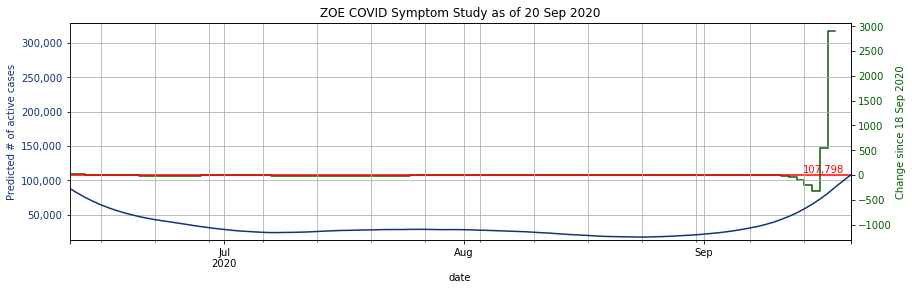

In [82]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

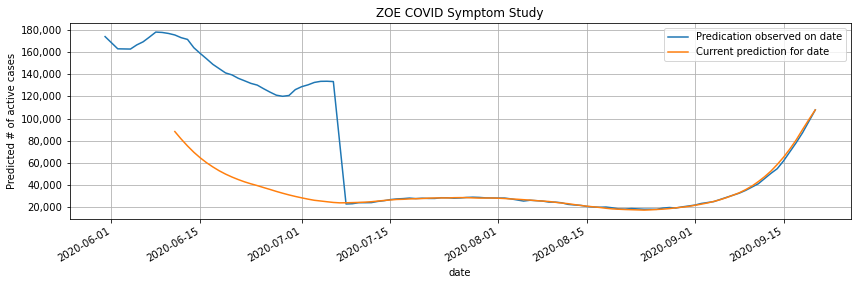

In [83]:
plot_study_evolution(curr_date, days=200)

In [90]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)
prevalence_map

,cartodb_id,the_geom,the_geom_webmercator,objectid,lad16cd,lad16nm,lad16nmw,bng_e,bng_n,long,...,cases_pm,percentage,discrete_percentage,discrete_cases_pm,percentage_string,cases_pm_string,cases_string,data_status,country,region
0,9776,0103000020E610000001000000C4010000AD9CD15F9CE2...,0103000020110F000001000000C401000034EC1A1775E3...,1,E06000001,Hartlepool,None,447157,531476,-1.27023,...,NaN,NaN,-1.0,-1,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 21-09-2020,England,North East
1,9788,0106000020E61000000300000001030000000100000004...,0106000020110F00000300000001030000000100000004...,13,E06000013,North Lincolnshire,None,497798,410996,-0.52410,...,3261.82,0.326182,0.1,500,0.3 %,3262,259,05:00:02 21-09-2020,England,Yorkshire and The Humber
2,9777,0106000020E61000000200000001030000000100000013...,0106000020110F00000200000001030000000100000013...,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,...,5386.21,0.538621,0.1,1000,0.5 %,5386,253,05:00:02 21-09-2020,England,North East
3,9778,0106000020E61000000200000001030000000100000006...,0106000020110F00000200000001030000000100000006...,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,...,3873.2,0.387320,0.1,500,0.4 %,3873,222,05:00:02 21-09-2020,England,North East
4,9779,0106000020E61000000200000001030000000100000025...,0106000020110F00000200000001030000000100000025...,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,...,3678.62,0.367862,0.1,500,0.4 %,3679,357,05:00:02 21-09-2020,England,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,10145,0106000020E610000002000000010300000001000000B0...,0106000020110F000002000000010300000001000000B0...,389,W06000022,Newport,Casnewydd,337897,187433,-2.89769,...,3454.09,0.345409,0.1,500,0.3 %,3454,289,05:00:02 21-09-2020,Wales,Wales
387,10146,0103000020E6100000010000006D1000003E242470162E...,0103000020110F0000010000006D10000075DF530DAA62...,390,W06000023,Powys,Powys,302328,273254,-3.43533,...,2782.23,0.278223,0.1,100,0.3 %,2782,256,05:00:02 21-09-2020,Wales,Wales
388,10147,0103000020E61000000100000060010000CAAE459CF9AC...,0103000020110F000001000000600100003FE916C4D9A7...,391,W06000024,Merthyr Tydfil,Merthyr Tudful,305916,206424,-3.36425,...,NaN,NaN,-1.0,-1,Not enough contributors,Not enough contributors,Not enough contributors,05:00:02 21-09-2020,Wales,Wales
389,10148,0103000020E610000001000000C0000000CA21EFF2CDF8...,0103000020110F000001000000C0000000DEAADBECED86...,325,E09000032,Wandsworth,None,525152,174137,-0.20021,...,2930.77,0.293077,0.1,100,0.3 %,2931,755,05:00:02 21-09-2020,England,London


In [91]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/Downloads/zoe_prevalence_map_2020-09-21_2020-09-22-17-51.pickle


In [86]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
356,Lisburn and Castlereagh,N09000007,1.530160
306,Liverpool,E08000012,1.310104
296,Bury,E08000002,1.159689
360,Ards and North Down,N09000011,1.048800
246,North Lanarkshire,S12000044,1.034512
305,Knowsley,E08000011,1.029832
297,Manchester,E08000003,1.015349
350,Belfast,N09000003,1.001405
248,Glasgow City,S12000046,0.880670
304,Wigan,E08000010,0.799349


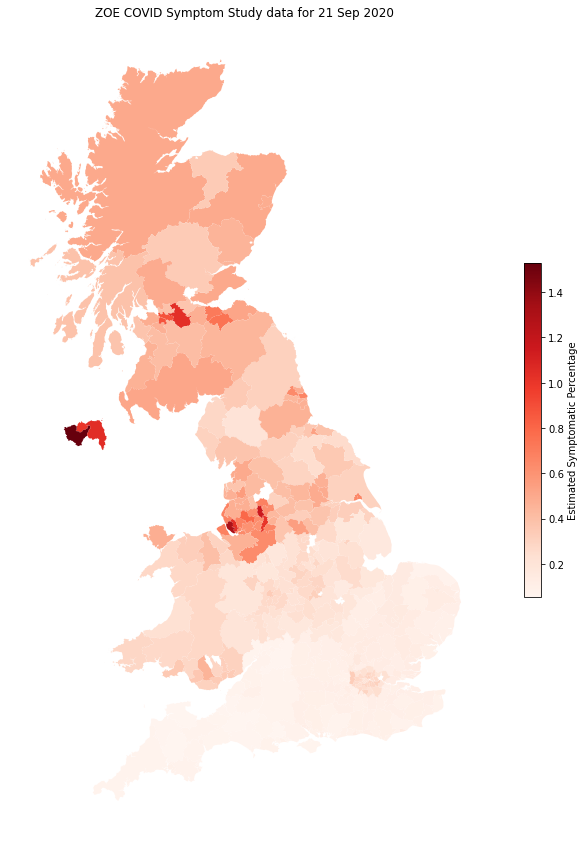

In [87]:
plot_map()